In [95]:
import numpy as np
import matplotlib.pyplot as plt

### 随机生成200个x点，范围在 [0, 2π]

In [96]:
x = np.random.uniform(0, 2 * np.pi, 200)
y_true = np.sin(x)
x_normalized = (x - x.min()) / (x.max() - x.min())#根据任务一梯度消失的经验继续使用归一化

### 初始化

In [97]:
a = np.random.randn(6)

In [98]:
learn_rate = 0.1
iterations = 1000000

In [99]:
def polynomial(x, a):
    return a[0] + a[1] * x + a[2] * x**2 + a[3] * x**3 + a[4] * x**4 + a[5] * x**5

### loss function

In [100]:
def loss_func(y_pred, y_true):
    return np.mean((y_pred - y_true) ** 2)

### 梯度下降

In [92]:
for i in range(iterations):
    y_pred = polynomial(x_normalized, a)
    error = y_pred - y_true
    
    #梯度计算
    gradients = [
        np.mean(error),  
        np.mean(error * x_normalized),  
        np.mean(error * x_normalized**2),  
        np.mean(error * x_normalized**3),  
        np.mean(error * x_normalized**4),  
        np.mean(error * x_normalized**5)   
    ]
    
    ##参数更新
    for j in range(6):
        a[j] -= learn_rate * gradients[j]
    if i % 100000 == 0:
        loss = loss_func(y_pred, y_true)
        print(f"Iteration {i}: Loss = {loss}")

Iteration 0: Loss = 0.39662554237025377
Iteration 50000: Loss = 0.017561142449651443
Iteration 100000: Loss = 0.015436103663036377
Iteration 150000: Loss = 0.01399282004184641
Iteration 200000: Loss = 0.012722789446677436
Iteration 250000: Loss = 0.011603838396645878
Iteration 300000: Loss = 0.010617935386452311
Iteration 350000: Loss = 0.009749205684251803
Iteration 400000: Loss = 0.008983668744962285
Iteration 450000: Loss = 0.008309012177965562
Iteration 500000: Loss = 0.00771439270328311
Iteration 550000: Loss = 0.00719026085767329
Iteration 600000: Loss = 0.006728206616752419
Iteration 650000: Loss = 0.006320823437445084
Iteration 700000: Loss = 0.0059615885228532185
Iteration 750000: Loss = 0.005644757373891345
Iteration 800000: Loss = 0.005365270922992518
Iteration 850000: Loss = 0.005118673748596848
Iteration 900000: Loss = 0.004901042048266444
Iteration 950000: Loss = 0.004708920206029532


### 参数更新

### 绘图

In [93]:
#生成点拟合训练图像
x_test = np.linspace(0, 2 * np.pi, 100)
x_test_normalized = (x_test - x_test.min()) / (x_test.max() - x_test.min())
y_test_true = np.sin(x_test)

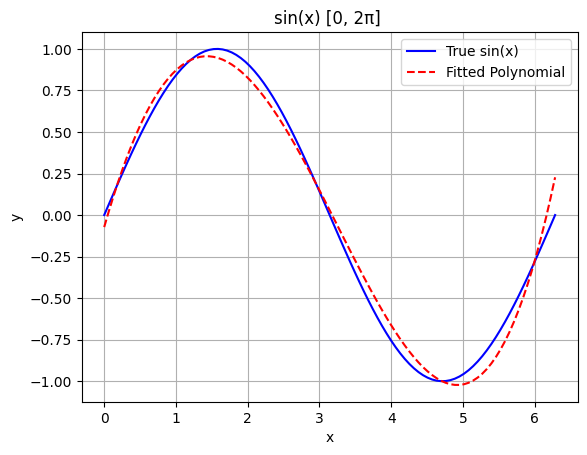

Final parameters: [ -0.07238697   9.50773766 -23.30009031   2.86136495  14.84744936
  -3.61689105]


In [94]:
plt.plot(x_test, y_test_true, label='True sin(x)', color='blue')
plt.plot(x_test, polynomial(x_test_normalized, a), label='Fitted Polynomial', color='red', linestyle='--')
plt.legend()
plt.title("sin(x) [0, 2π] ")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

#输出最终的参数值
print("Final parameters:", a)